# Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Data Collection

In [2]:
df=pd.read_csv("Unemployment_in_India.csv")
df

,Region,Date,Frequency,Estimated_Unemployment_Rate(%),Estimated_Employed,Estimated_Labour_Participation_Rate(%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#check the missing values
df.isnull().sum()

Region                                     28
 Date                                      28
 Frequency                                 28
 Estimated_Unemployment_Rate(%)            28
 Estimated_Employed                        28
 Estimated_Labour_Participation_Rate(%)    28
Area                                       28
dtype: int64

In [4]:
df=df.dropna(axis = 0, how ='any')

In [5]:
df

,Region,Date,Frequency,Estimated_Unemployment_Rate(%),Estimated_Employed,Estimated_Labour_Participation_Rate(%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [6]:
#Columns of the dataset
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated_Unemployment_Rate(%)',
       ' Estimated_Employed', ' Estimated_Labour_Participation_Rate(%)',
       'Area'],
      dtype='object')

In [7]:
#info regarding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1    Date                                    740 non-null    object 
 2    Frequency                               740 non-null    object 
 3    Estimated_Unemployment_Rate(%)          740 non-null    float64
 4    Estimated_Employed                      740 non-null    float64
 5    Estimated_Labour_Participation_Rate(%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [8]:
#Statistical Measures of the data
df.describe()

,Estimated_Unemployment_Rate(%),Estimated_Employed,Estimated_Labour_Participation_Rate(%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


# Data Analysis with Visualization

<AxesSubplot:>

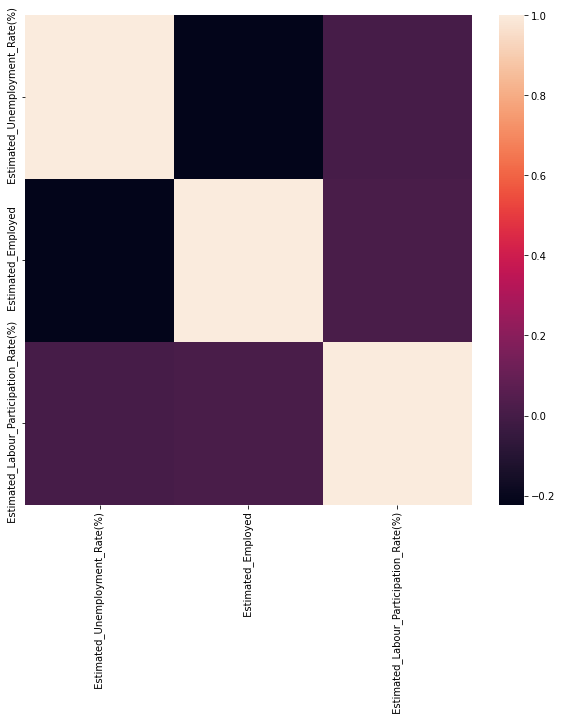

In [9]:
plt.figure(figsize=(10,9))
cormat=df.corr()
round(cormat,2)
sns.heatmap(cormat)

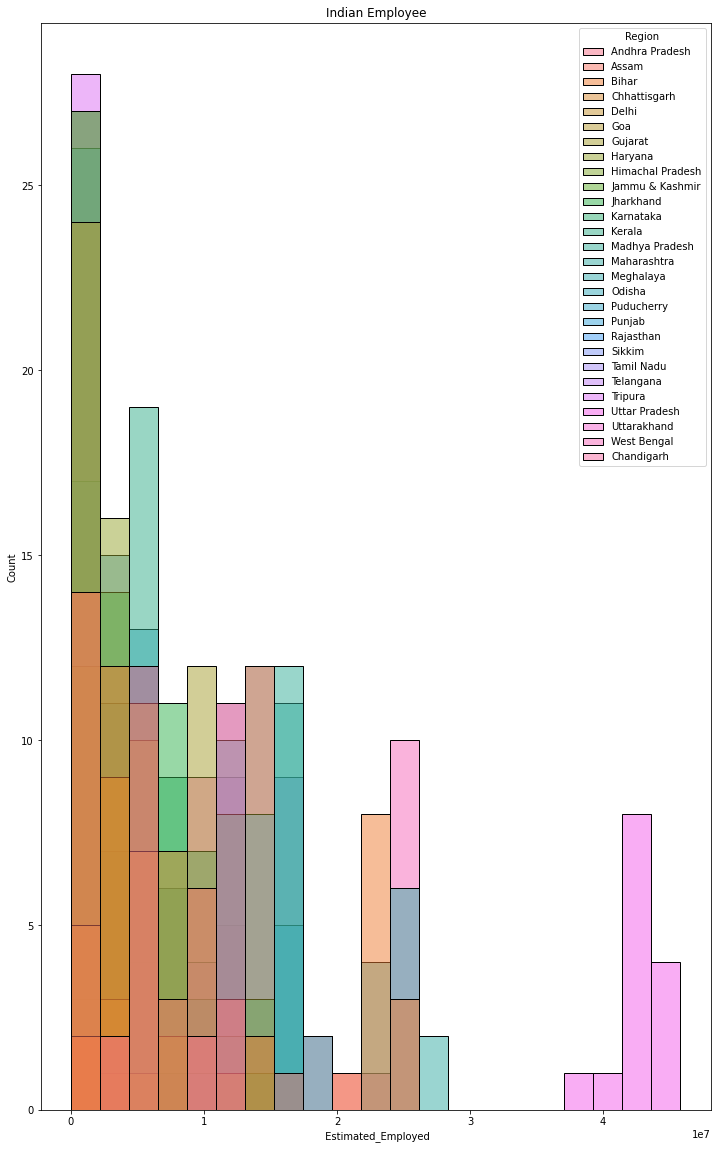

In [10]:
plt.figure(figsize=(12,20))
plt.title("Indian Employee")
sns.histplot(x=' Estimated_Employed',hue='Region',data=df)
plt.show()

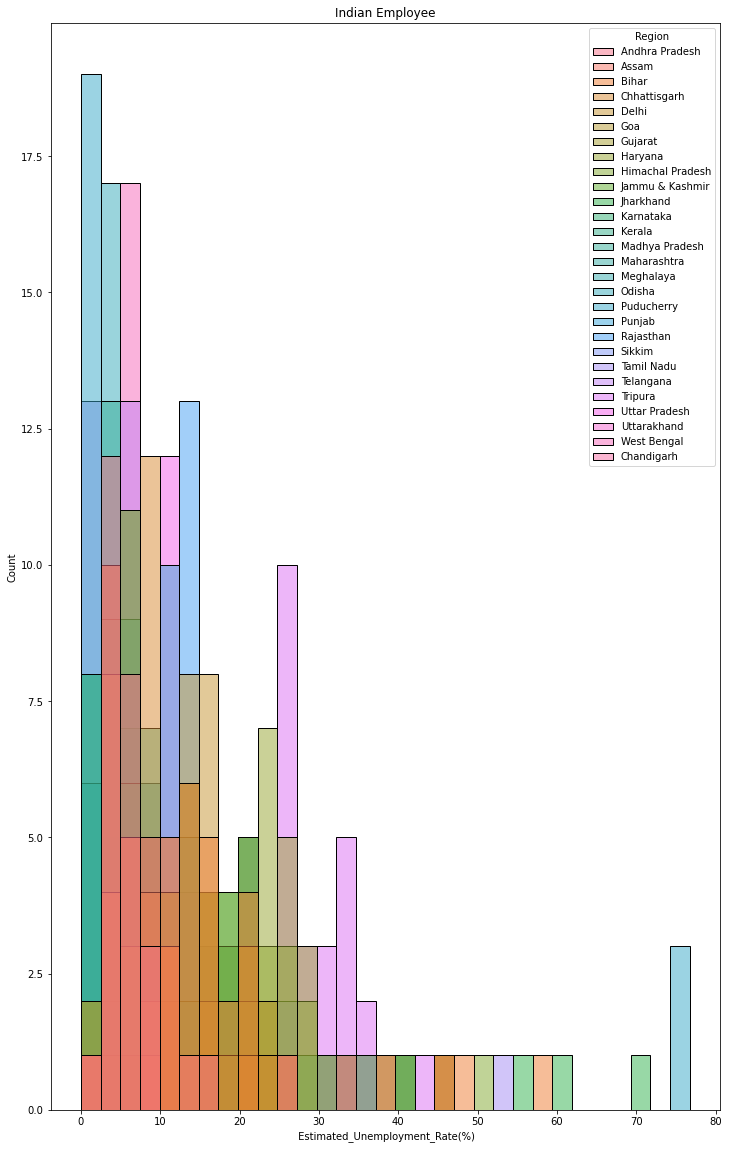

In [11]:
plt.figure(figsize=(12,20))
plt.title("Indian Employee")
sns.histplot(x=' Estimated_Unemployment_Rate(%)',hue='Region',data=df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

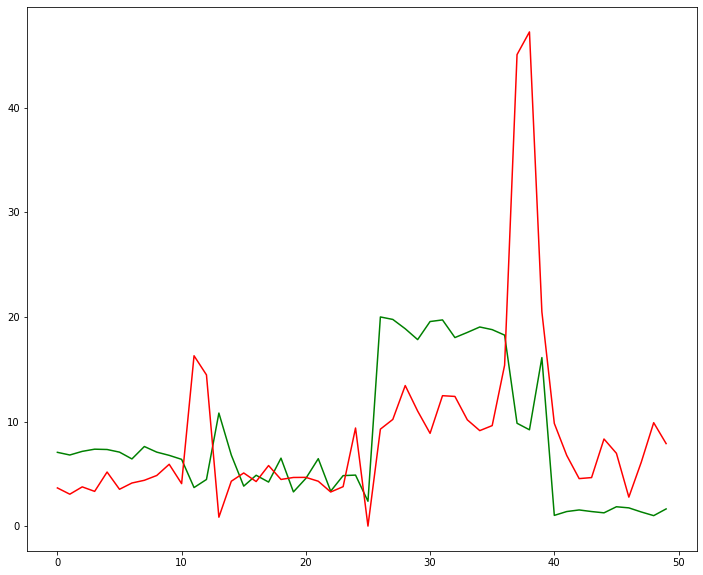

In [12]:
Employed = df[' Estimated_Employed'].iloc[:50]
Unemployed = df[' Estimated_Unemployment_Rate(%)'].iloc[:50]

#normalize the employed in range 1 to 20
Employed = (Employed - Employed.min())/(Employed.max() - Employed.min()) * 19 + 1

plt.figure(figsize=(12,10))
plt.plot(Employed, label='Employed', color='green')
plt.plot(Unemployed, label='Unemployed', color='red')
plt.show

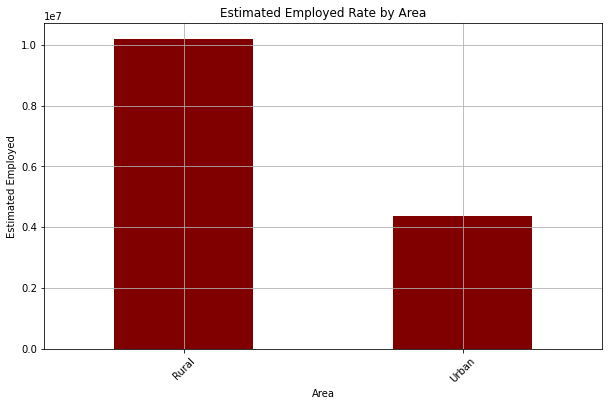

In [16]:
import matplotlib.pyplot as plt

# Group the data by 'Area' and calculate the mean of 'Estimated_Employed' for each area
area_employed = df.groupby('Area')[' Estimated_Employed'].mean()

# Plot the graph
plt.figure(figsize=(10, 6))
area_employed.plot(kind='bar',color='maroon')
plt.xlabel('Area')
plt.ylabel('Estimated Employed')
plt.title('Estimated Employed Rate by Area')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


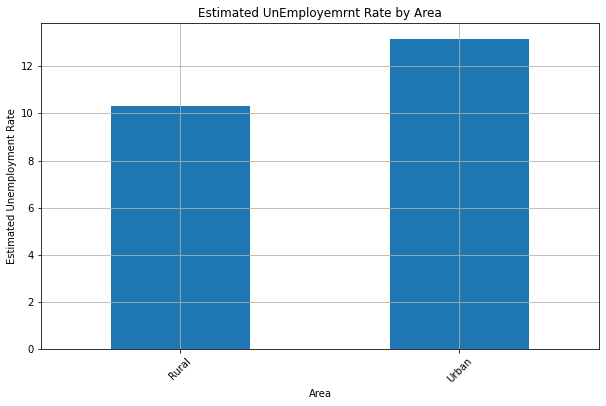

In [15]:
import matplotlib.pyplot as plt

# Group the data by 'Area' and calculate the mean of 'Estimated_Employed' for each area
area_employed = df.groupby('Area')[' Estimated_Unemployment_Rate(%)'].mean()

# Plot the graph
plt.figure(figsize=(10, 6))
area_employed.plot(kind='bar')
plt.xlabel('Area')
plt.ylabel('Estimated Unemployment Rate')
plt.title('Estimated UnEmployemrnt Rate by Area')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


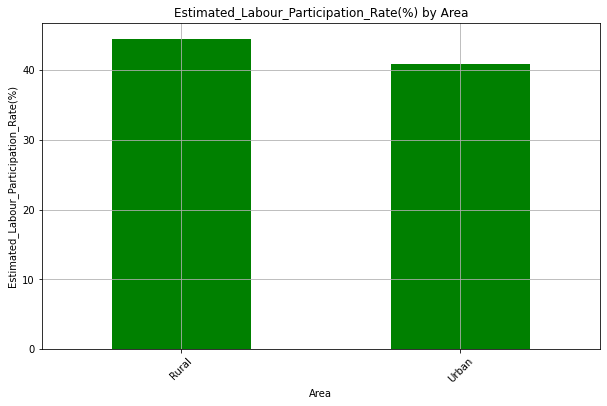

In [17]:


import matplotlib.pyplot as plt

# Group the data by 'Area' and calculate the mean of 'Estimated_Employed' for each area
area_employed = df.groupby('Area')[' Estimated_Labour_Participation_Rate(%)'].mean()

# Plot the graph
plt.figure(figsize=(10, 6))
area_employed.plot(kind='bar',color='green')
plt.xlabel('Area')
plt.ylabel('Estimated_Labour_Participation_Rate(%)')
plt.title('Estimated_Labour_Participation_Rate(%) by Area')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\MANOHAR\AppData\Local\Temp\ipykernel_11176\856979855.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[' Date'] = pd.to_datetime(df[' Date'])
C:\Users\MANOHAR\AppData\Local\Temp\ipykernel_11176\856979855.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(' Date', inplace=True)


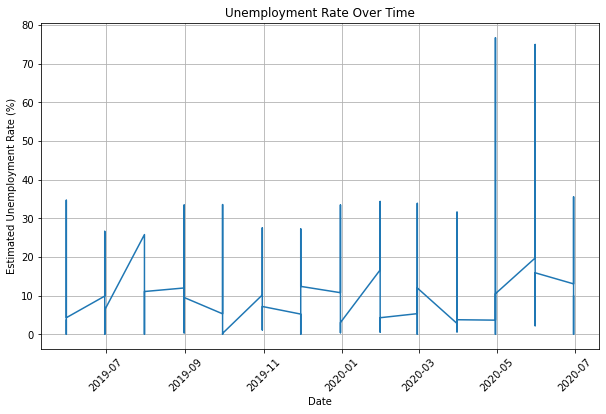

In [20]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'df'
# Plotting the Estimated_Unemployment_Rate(%) over time

# Convert the 'Date' column to datetime type
df[' Date'] = pd.to_datetime(df[' Date'])

# Sort the DataFrame by the 'Date' column
df.sort_values(' Date', inplace=True)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(df[' Date'], df[' Estimated_Unemployment_Rate(%)'])
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Conclusion

Unemployment rate is higher in urban area compared to rural area

Estimated Labour participation rate is higher in rural area compared to urban area